<a href="https://colab.research.google.com/github/PrabishaPradeep/DSA_Internship/blob/main/internship_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis and Loyalty Prediction

---



**Problem Statement :** analyze customer purchase behavior, satisfaction, and loyalty scores,using the data given and develop a predictive model that predicts customer satisfaction or loyalty based on user inputs.

**Dataset description**



*   **Age**: Age of the customer

*   **Items Purchased**: Number of items purchased in a single transaction

*   **Total Spent**: Total amount spent on the transaction

*   **Discount (%)**: Percentage discount on the purchase

*   **Satisfaction Score**: Self-reported customer satisfaction score

*   **Warranty Extension**: Whether the customer opted for warranty extension

*   **Gender**: Gender of the customer

*   **Region**: Customer's region

*   **Product Category**: Category of the purchased product

*   **Payment Method**: Payment method used (e.g., UPI, Cash)

*   **Revenue**: Total revenue from the customer

*   **Store Rating**: Rating given by the customer to the store

*   **Loyalty Score**: Customer's loyalty score

*   **Membership Status**: Whether the customer is a member

*   **Preferred Visit Time**: Preferred time of visit

**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Read the dataset into python environment**

In [2]:
df=pd.read_csv(r"/content/Electronic - Electronic.csv.csv")
pd.set_option('display.max_columns',None)
df.head(3).round(2)

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.23,47.08,1.00,1,Male,South,Accessories,UPI,149.25,3.66,3.60,1.0,Evening
1,69,10,420.14,7.99,3.76,1,Female,South,Accessories,Cash,1485.52,3.55,25.76,1.0,Evening
2,46,4,127.74,37.23,1.77,1,Male,East,Laptop,Credit Card,85.55,3.92,7.02,1.0,Morning


In [3]:
#round off the columns Satisfaction Score  ,Loyalty Score,and store rating

df['Satisfaction Score']=df['Satisfaction Score'].round(1)
df['Loyalty Score']=df['Loyalty Score'].round(1)
df['Store Rating'] = df['Store Rating'].round(1)


In [4]:
df.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.0,1,Male,South,Accessories,UPI,149.252145,3.7,3.6,1.0,Evening
1,69,10,420.142612,7.985739,3.8,1,Female,South,Accessories,Cash,1485.524222,3.6,25.8,1.0,Evening
2,46,4,127.742817,37.225718,1.8,1,Male,East,Laptop,Credit Card,85.550131,3.9,7.0,1.0,Morning
3,32,9,417.722683,8.227732,1.9,0,Female,East,Tablet,UPI,824.118724,3.9,7.6,1.0,Afternoon
4,60,13,608.031366,5.000000,3.9,0,Female,South,Tablet,UPI,2463.590392,3.8,29.5,0.0,Morning


**Check basic information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [6]:
df.shape

(5000, 15)

Dataset has 15 features with 5000 entries. Among that, 10 features are numerical (7 float and 3 integer) and 5 are categorical features.

**Check for unique values**

In [7]:
(df.nunique()).sort_values(ascending=False)

,0
Total Spent,5000
Revenue,5000
Discount (%),4417
Loyalty Score,370
Age,52
Satisfaction Score,41
Store Rating,18
Items Purchased,14
Product Category,5
Payment Method,5


Features ***'Warranty Extension'*** and **'Membership Status**' have  2 unique values out of 5000 entries which are 0 and 1.it is a binary variable, we can treat it as a categorical variable.

**Check for duplicates**

In [8]:
df.duplicated().sum()

0

There are no duplicate entries in the dataset.

## Exploratory data analysis

**Summary statistics of numerical features**

In [9]:
categorical = ['Gender', 'Region', 'Product Category', 'Payment Method','Warranty Extension', 'Membership Status', 'Preferred Visit Time']
numerical = ['Age', 'Items Purchased', 'Total Spent', 'Discount (%)','Satisfaction Score','Revenue', 'Store Rating','Loyalty Score']

In [10]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,43.58,14.92,18.00,31.00,43.00,56.00,69.00
Items Purchased,5000.0,7.54,4.01,1.00,4.00,7.00,11.00,14.00
Total Spent,5000.0,243.72,154.95,15.11,119.13,221.51,346.17,699.61
Discount (%),5000.0,26.62,13.59,5.00,15.38,27.85,38.09,48.49
Satisfaction Score,5000.0,2.65,1.53,1.00,1.00,2.30,4.10,5.00
Warranty Extension,5000.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
Revenue,5000.0,718.00,776.79,-201.43,164.70,380.55,1047.43,3523.47
Store Rating,4997.0,3.98,0.25,3.10,3.80,4.00,4.10,4.80
Loyalty Score,5000.0,15.64,9.15,0.00,7.90,14.00,23.50,39.20
Membership Status,4994.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00




*   The age of customers ranges from 18 to 69. the mean (43.58) slightly closer the median (43), indicating the distribution is approximately symmetric.
*   On average, customers purchased around 7 items in a single transaction. 75% of customers purchased 11 or fewer items in a single transaction while only 25% customers buy more than 11 items.
*   The satisfaction score ranges from 1 to 5 with an average score of around 2.65.indicating a somewhat average  level of customer satisfaction.
*   majority of the customers did not opt for a warranty extension, only 22% who did.
*   The negative revenue suggests there may be refunds, returns.
*   most of the store ratings are around 4.
*   The loyalty score ranges from 0 to 39.20 with an average score of around 15.64.
*   31% of the customers are members, while the 69% are not.





In [11]:
df.describe(include='object').T


,count,unique,top,freq
Gender,4998,3,Male,2446
Region,5000,4,South,1310
Product Category,5000,5,Accessories,1015
Payment Method,4996,5,Net Banking,1038
Preferred Visit Time,4992,3,Morning,1672


**Distribution of numerical features**

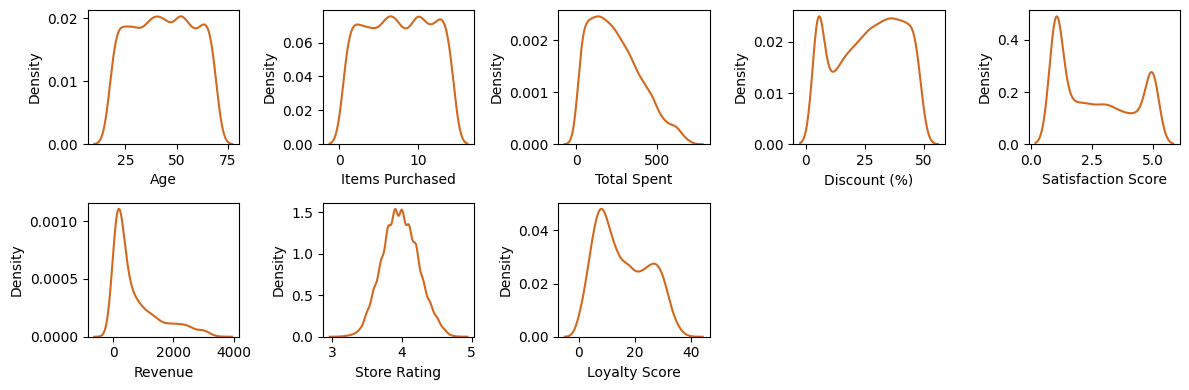

In [12]:
plt.figure(figsize=(12,4))
for i in range(0, len(numerical)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[numerical[i]], color='chocolate')
    plt.tight_layout()


*   distribution of total spent is Skewed to the left, with most customers spending smaller amounts and fewer customers spending at higher levels.
* The distribution of Store Rating is tightly centered around a value near 4.0, implying that most customers rated the store positively.
*   Revenue distribution Highly right-skewed, with most customers contributing lower revenue and a small number contributing significantly higher amounts.


**Distribution of categorical features**

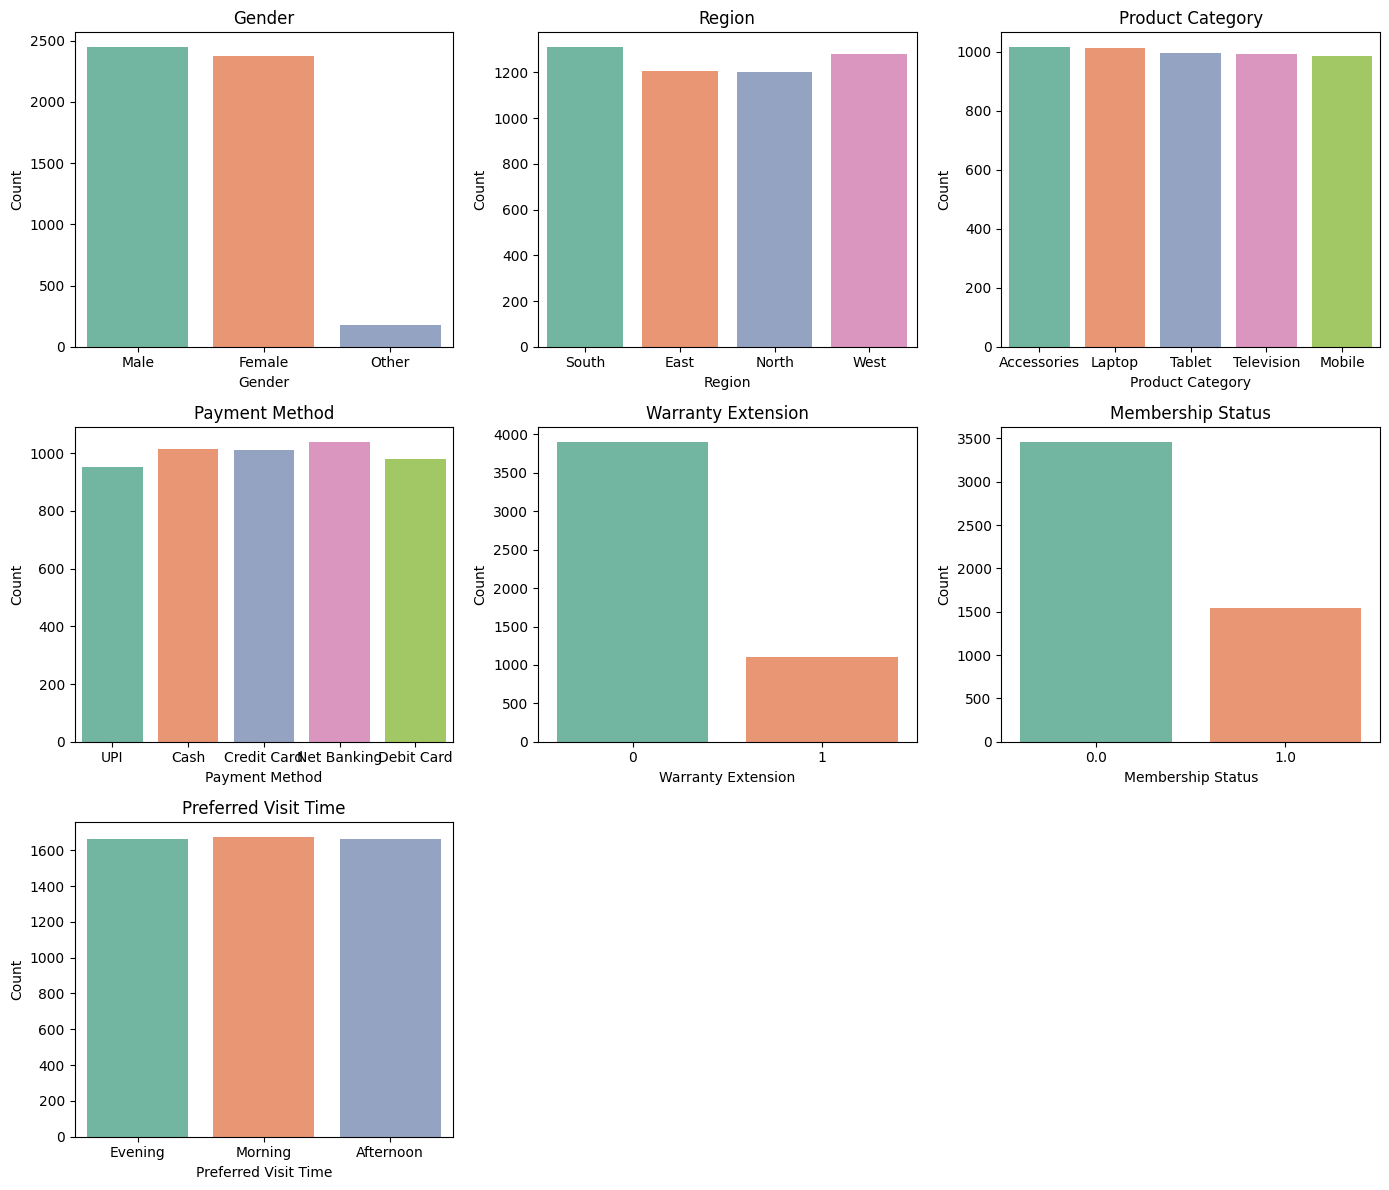

In [13]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



*   Male and Female categories are almost equally represented.small percentage falls under the "Other" category
*   All four regions (South, East, North, West) have roughly equal representation, suggesting no significant regional preferences
*   The distribution across categories (Accessories, Laptop, Tablet, Television, Mobile) appears uniform, with no single category dominating.
*   UPI, Cash, Credit Card, and Banking/Debit Card methods have similar usage rates, indicating diverse payment preferences.
* Most customers did not opt for a warranty extension or have any membership
* evening, Morning, and Afternoon are almost equally preferred as visit times.

**Distribution of Loyalty Score**

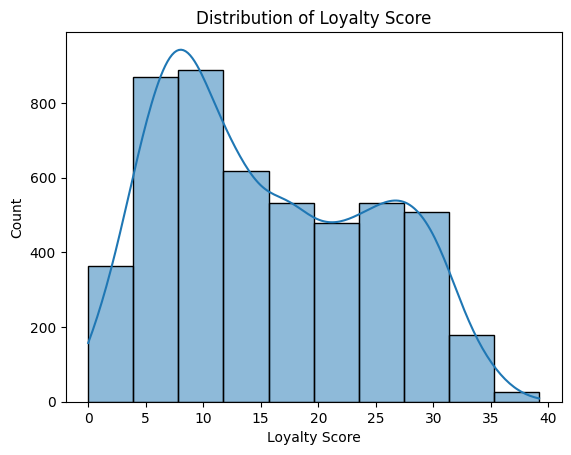

In [14]:
sns.histplot(df['Loyalty Score'], bins=10, kde=True)
plt.title('Distribution of Loyalty Score')
plt.show()

The graph shows a positively skewed distribution, with most of the customers have  loyalty scores in the range 5-10 which is very low.only smaller group of customers have high loyalty scores.

**Distribution of Satisfaction Scores**

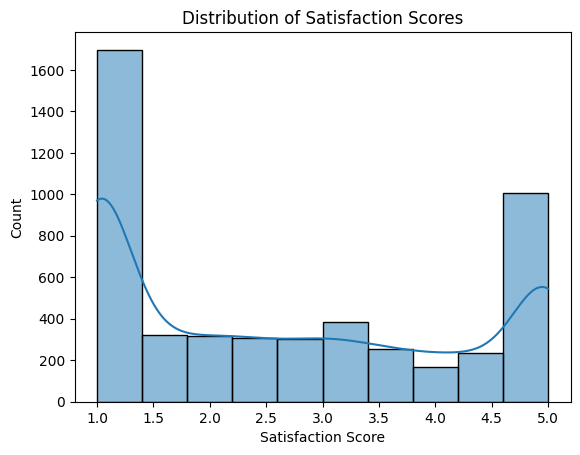

In [15]:
sns.histplot(df['Satisfaction Score'], bins=10, kde=True)
plt.title('Distribution of Satisfaction Scores')
plt.show()

The graph shows a bimodal distribution.first peak shows most of the customers have given very low satisfaction score of 1 and second peak at the end shows some customers gave a high satisfaction rating of 5 but the first peak is comparitatively larger than the second peak.

**Check for outliers**

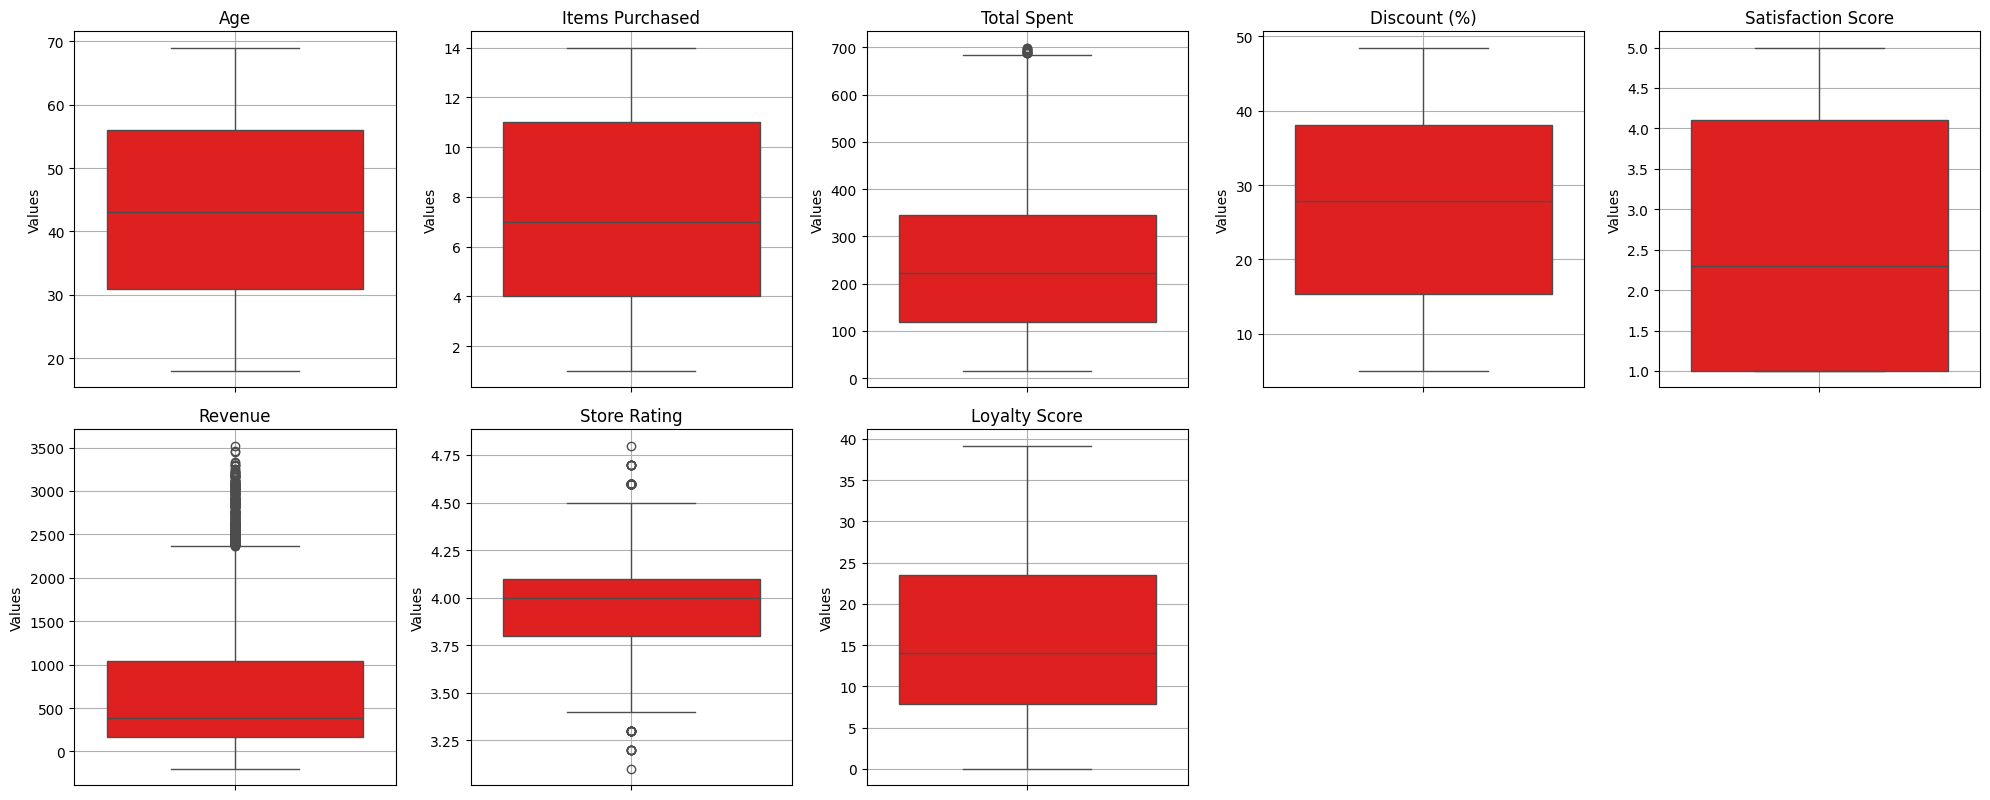

In [16]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(df[col],color='red')
    plt.title(f'{col}')
    plt.ylabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

these boxplots shows there are quite a lot of outliers in some of the variables.

**Multivariate data analysis**

**Correlation**

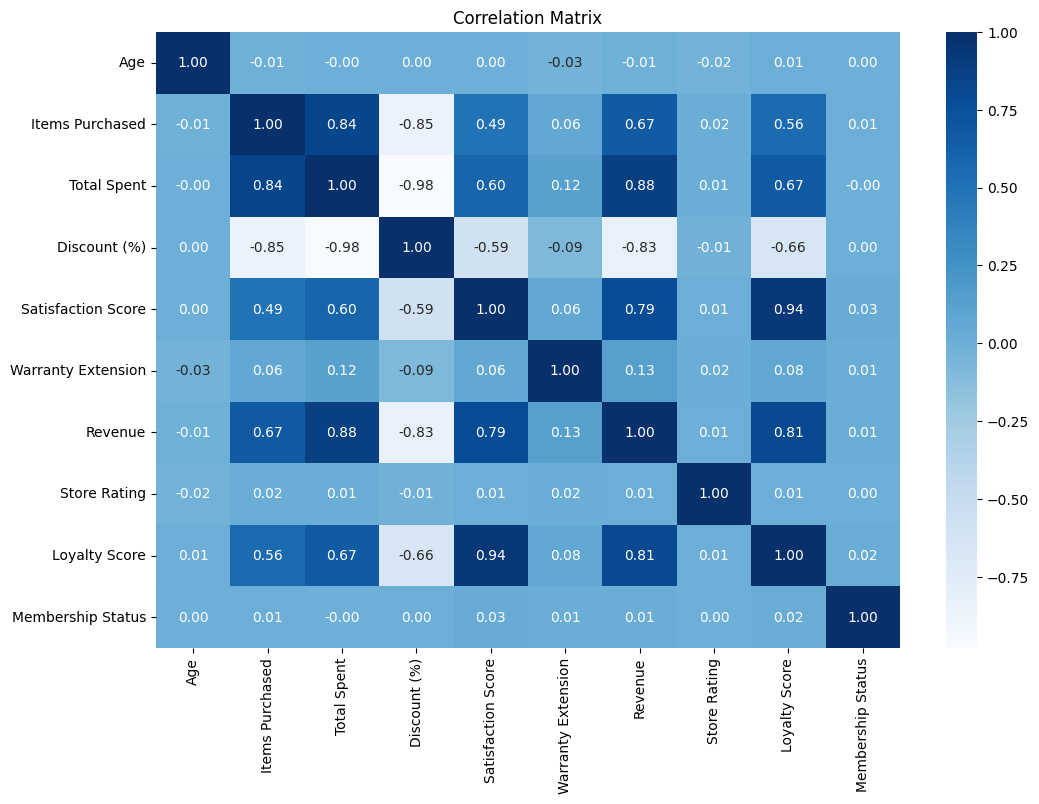

In [17]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
corr
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



*   The correlation coefficient between Age and Loyalty Score is approximately 0.01,shows very weak correlation suggests that Age has almost no direct linear impact on Loyalty Score.
*   Revenue & Total Spent have Strong positive correlation of 0.88, means customers with higher revenue genrally spend more .
*   Satisfaction Score & Loyalty Score have Very strong positive correlation of 0.94, indicates that customers with higher satisfaction score are very much loyal to the store.
*   revenue and loyalty score have strong positive correlation 0.81
*   the correlation between item purchased and loyalty score is 0.56 which shows moderately strong positive correlation. it suggests that customers who purchase more tend to have high loyalty scores.
*   The correlation between discount(%) and loyalty score (-0.66) indicates a strong negative correlation  This means that as the discount percentage increases, the loyalty score tends to decrease.





   



**Impact of item purchased and total spent on satisfaction score**

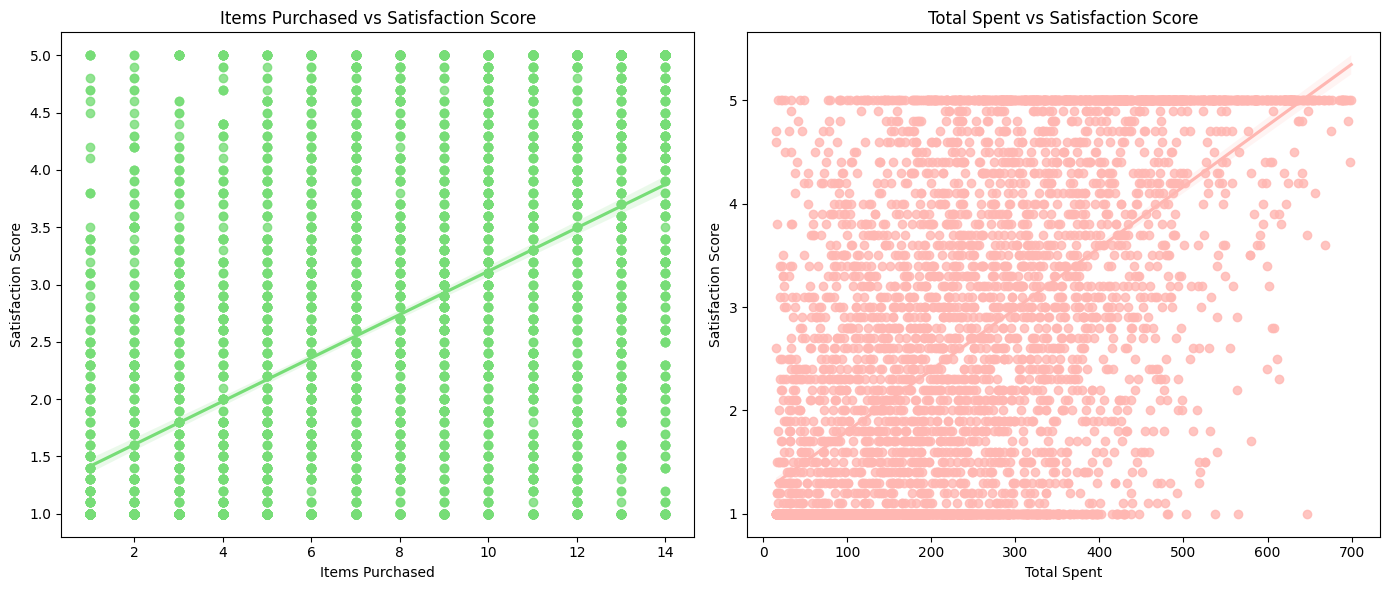

In [18]:
colors = ['#77DD77', '#FFB7B2']

plt.figure(figsize=(14, 6))
for idx, (i, color) in enumerate(zip(['Items Purchased', 'Total Spent'], colors), start=1):
    plt.subplot(1, 2, idx)
    sns.regplot(x=i, y='Satisfaction Score', data=df, color=color)
    plt.title(f'{i} vs Satisfaction Score')
    plt.xlabel(i)
    plt.ylabel('Satisfaction Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

both the plots show a positive trend.as the item purchased and total spent increases satisfaction score also increases.it shows that if the customer is satisfied they will spent more and buy more .

**Impact of item purchased and total spent on loyalty score**

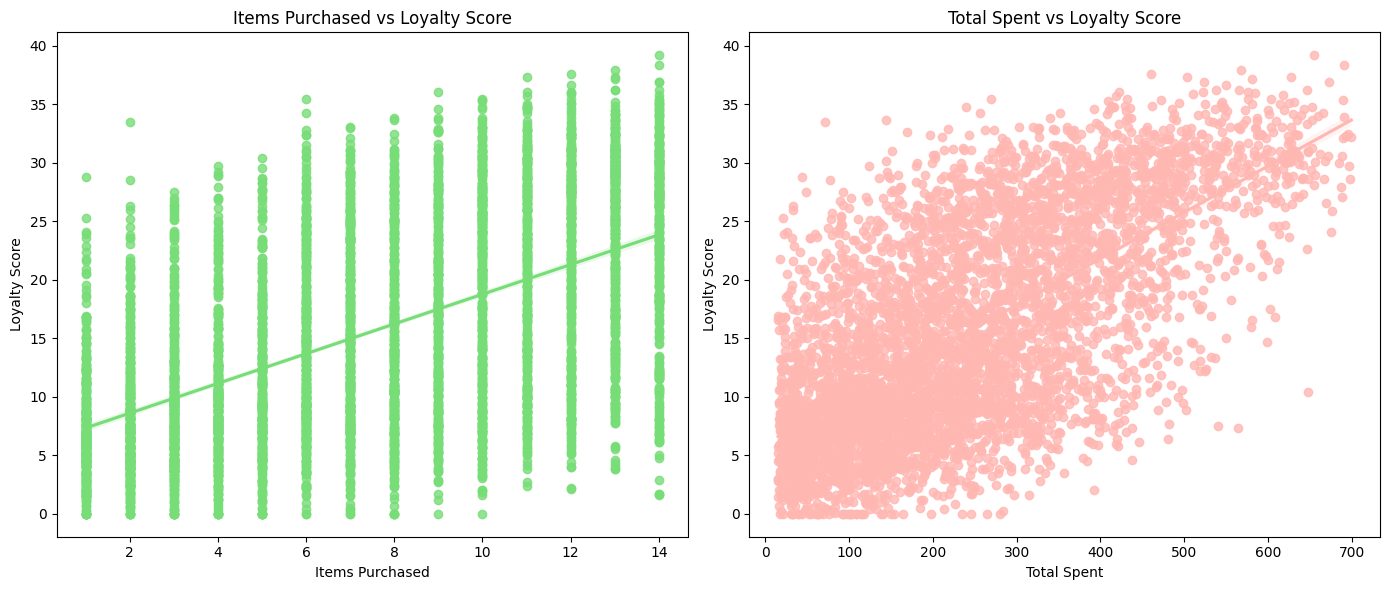

In [19]:
colors = ['#77DD77', '#FFB7B2']

plt.figure(figsize=(14, 6))
for idx, (i, color) in enumerate(zip(['Items Purchased', 'Total Spent'], colors), start=1):
    plt.subplot(1, 2, idx)
    sns.regplot(x=i, y='Loyalty Score', data=df, color=color)
    plt.title(f'{i} vs Loyalty Score')
    plt.xlabel(i)
    plt.ylabel('Loyalty Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

both the plots show a positive trend. customers who buy more and spent more will usually have high loyalty score

 **Impact of Discount(%) on Loyalty Score**

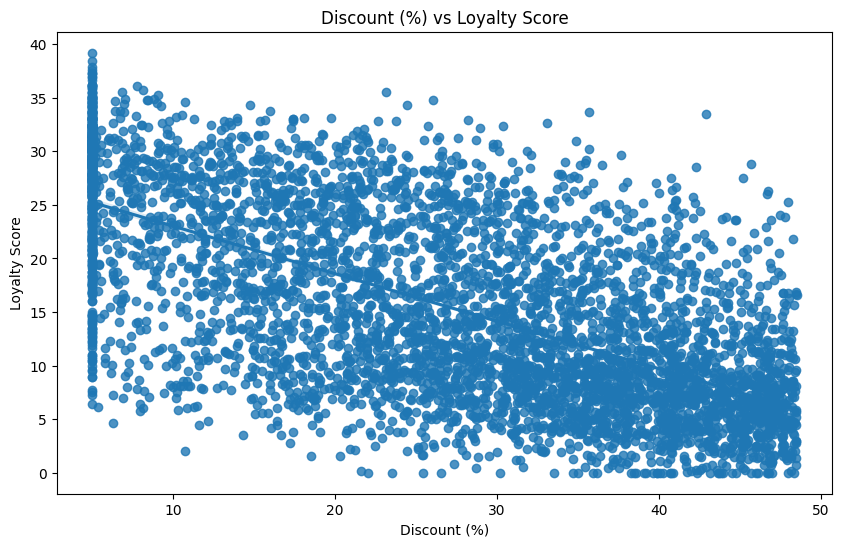

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount (%)', y='Loyalty Score', data=df)
plt.title( 'Discount (%) vs Loyalty Score')
plt.xlabel('Discount (%)')
plt.ylabel('Loyalty Score')
plt.show()


The scatter plot shows negative relationship. higher
the discounts lower the loyalty scores.

**Impact of Satisfaction Score on Loyalty Score**

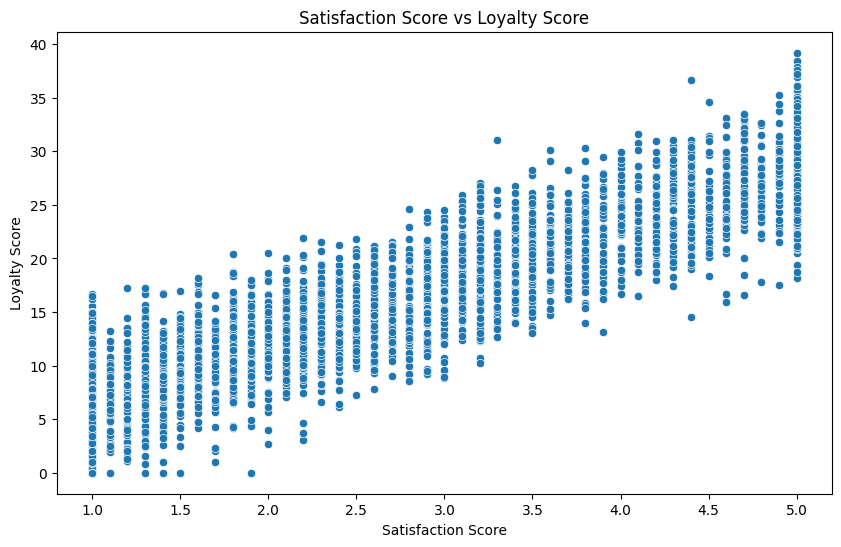

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Satisfaction Score', y='Loyalty Score', data=df)
plt.title('Satisfaction Score vs Loyalty Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Loyalty Score')
plt.show()


shows a postive linear relationship

**Gender impact on loyalty score**

<Axes: ylabel='Loyalty Score'>

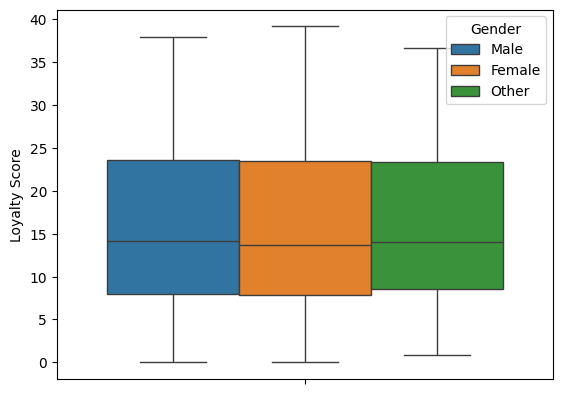

In [22]:
sns.boxplot(data=df,y='Loyalty Score',hue='Gender')

box plot shows a little differences but not that significant.

**payment method vs loyalty score**

<Axes: ylabel='Loyalty Score'>

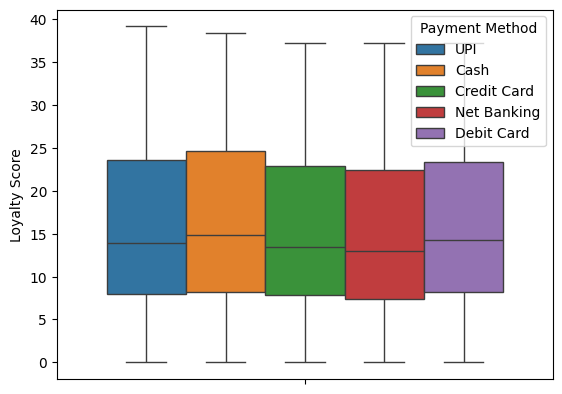

In [23]:
sns.boxplot(data=df,y='Loyalty Score',hue='Payment Method')

**Warranty Extension impact on Loyalty Score**

<Axes: ylabel='Loyalty Score'>

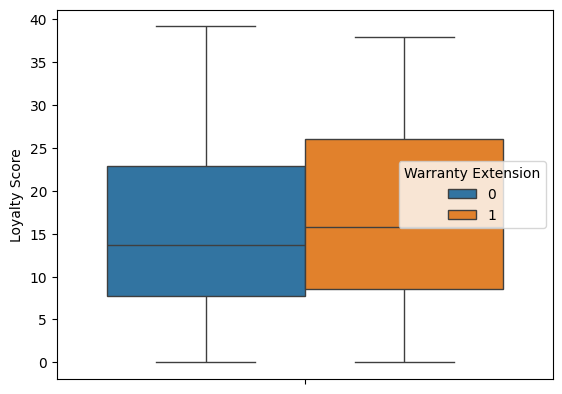

In [24]:
sns.boxplot(data=df,y='Loyalty Score',hue='Warranty Extension')

Customers with warranty extension shows higher loyalty score

**membership status impact on loyalty score**

<Axes: ylabel='Loyalty Score'>

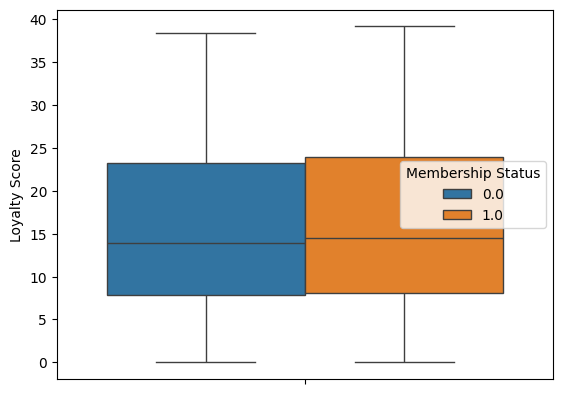

In [25]:
sns.boxplot(data=df,y='Loyalty Score',hue='Membership Status')

Members have slightly higher loyalty score than non members

**preferred visit time vs loyalty score**

<Axes: ylabel='Loyalty Score'>

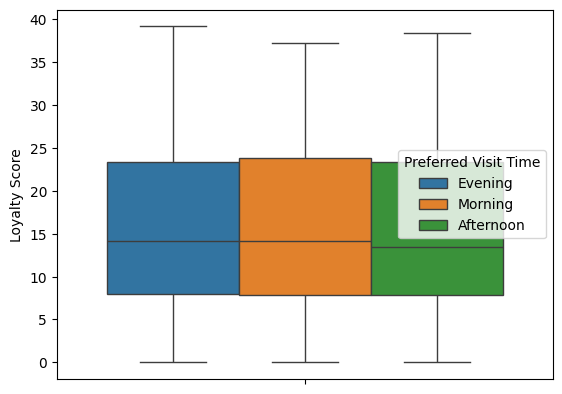

In [26]:
sns.boxplot(data=df,y='Loyalty Score',hue='Preferred Visit Time')

**impact of loyalty score on store rating**

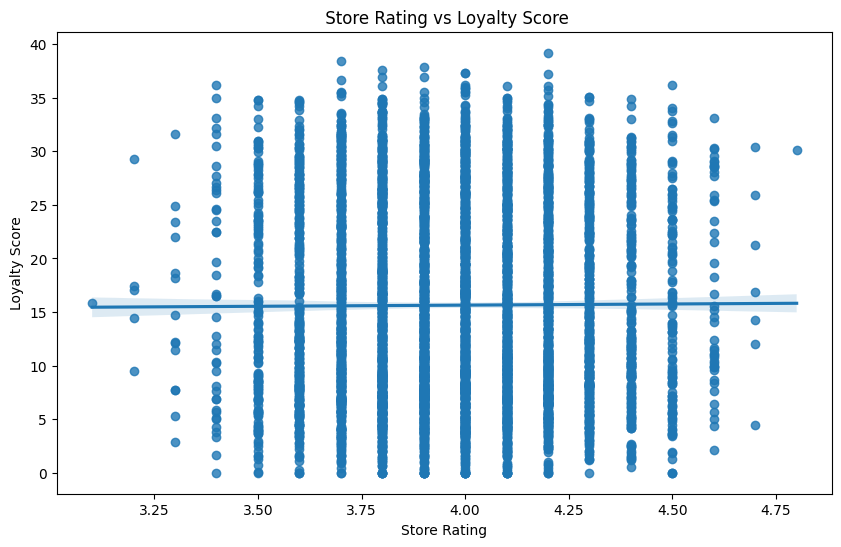

In [27]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Store Rating', y='Loyalty Score', data=df)
plt.title(' Store Rating vs Loyalty Score')
plt.xlabel('Store Rating')
plt.ylabel('Loyalty Score')
plt.show()

the scatterplot shows no linear relationship between store rating given by customers and their loyalty score.

**Segment customer data based on Region and Product Category**

In [28]:
region_analysis = df.groupby('Region').agg({'Satisfaction Score': 'mean', 'Loyalty Score': 'mean'}).round(1)
print(region_analysis)
print('--------------------------------------------------------------------------------------------------------------')
product_analysis = df.groupby('Product Category').agg({'Satisfaction Score': 'mean', 'Loyalty Score': 'mean'}).round(1)
print(product_analysis)

        Satisfaction Score  Loyalty Score
Region                                   
East                   2.7           15.7
North                  2.7           15.9
South                  2.6           15.5
West                   2.6           15.5
--------------------------------------------------------------------------------------------------------------
                  Satisfaction Score  Loyalty Score
Product Category                                   
Accessories                      2.7           15.8
Laptop                           2.6           15.3
Mobile                           2.6           15.4
Tablet                           2.7           15.8
Television                       2.7           16.0


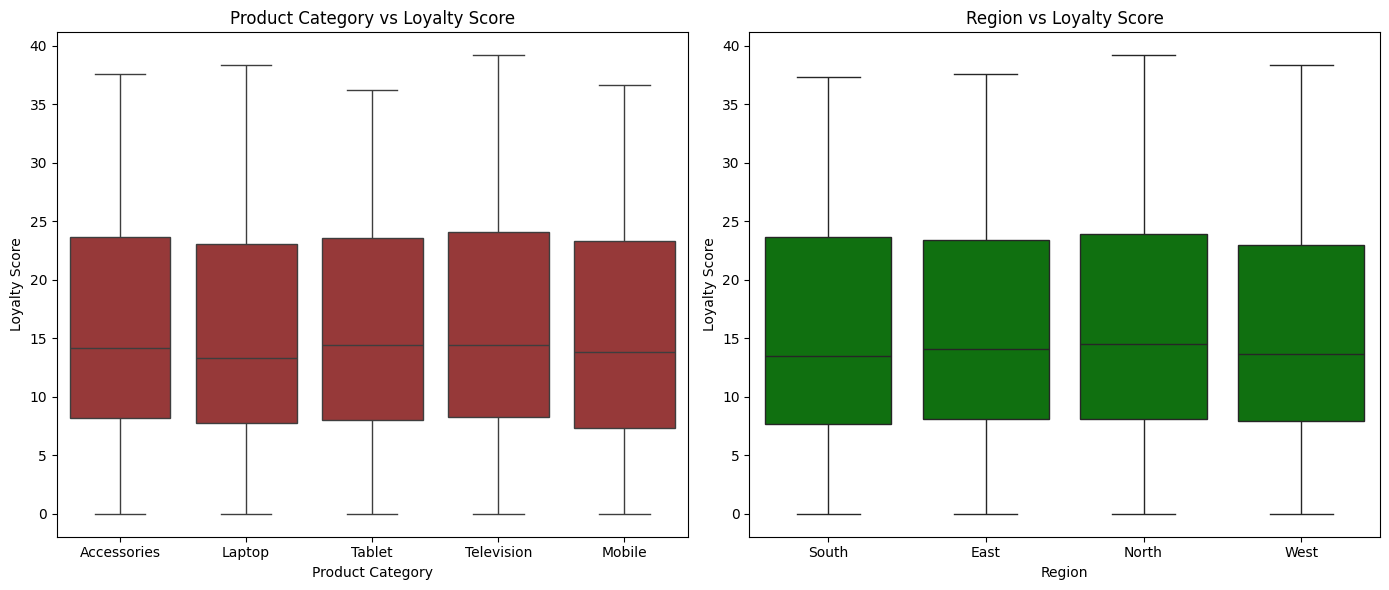

In [29]:
plt.figure(figsize=(14, 6))
for idx, (i, color) in enumerate(zip(['Product Category','Region'], ['brown', 'green']), start=1):
    plt.subplot(1, 2, idx)
    sns.boxplot(x=i, y='Loyalty Score', data=df, color=color)
    plt.title(f'{i} vs Loyalty Score')
    plt.xlabel(i)
    plt.ylabel('Loyalty Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

both the box plots  shows slight variations but the overall pattern suggests that there might not be any significant difference in loyalty scores


# Data Pre - Processing

**Check for null values**

In [30]:
 df.isnull().sum().sort_values(ascending=False)


,0
Preferred Visit Time,8
Membership Status,6
Payment Method,4
Store Rating,3
Gender,2
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0


Null values are present in  ***Preferred Visit Time*** (8) ,***Membership Status*** (6) ,***Store Rating*** (3) ,***Payment Method*** (4) and ***Gender*** (2).

**null value handling**

In [31]:
df['Store Rating'].skew().round(2)

0.07


*   Store Rating (shows a skewness 0.07 which is very close to zero) shows a nearly normal distribution ,we can use mean to fill null values.

*   The Membership Status column is ordinal.so Using the median for imputation is robust to outliers and is suitable for skewed distributions.

*   null values in categorical variables like Gender, Payment Method, and Preferred Visit Time can be handled Using the mode .


In [32]:
df['Store Rating'] = df['Store Rating'].fillna(df['Store Rating'].mean())
df['Membership Status'] = df['Membership Status'].fillna(df['Membership Status'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
df['Preferred Visit Time'] = df['Preferred Visit Time'].fillna(df['Preferred Visit Time'].mode()[0])

In [33]:
# check null values again

df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


All null values are imputed properly.

**Outlier Handling**

In [34]:
# Calculate IQR and identify outliers for numerical columns
for column in numerical:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column} : {len(outliers)}")


Outliers in Age : 0
Outliers in Items Purchased : 0
Outliers in Total Spent : 13
Outliers in Discount (%) : 0
Outliers in Satisfaction Score : 0
Outliers in Revenue : 301
Outliers in Store Rating : 73
Outliers in Loyalty Score : 0


In [35]:
outlier_col = ['Total Spent', 'Revenue', 'Store Rating']

for i in outlier_col:
    Q1 = np.percentile(df[i], 25, method='midpoint')
    Q3 = np.percentile(df[i], 75, method='midpoint')
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR

    # Clip outliers in the column
    df[i] = df[i].clip(upper=up_lim, lower=low_lim)

    print(f"Clipping completed for {i}. Values outside the IQR bounds are clipped.")


Clipping completed for Total Spent. Values outside the IQR bounds are clipped.
Clipping completed for Revenue. Values outside the IQR bounds are clipped.
Clipping completed for Store Rating. Values outside the IQR bounds are clipped.


**Recheck for outliers**

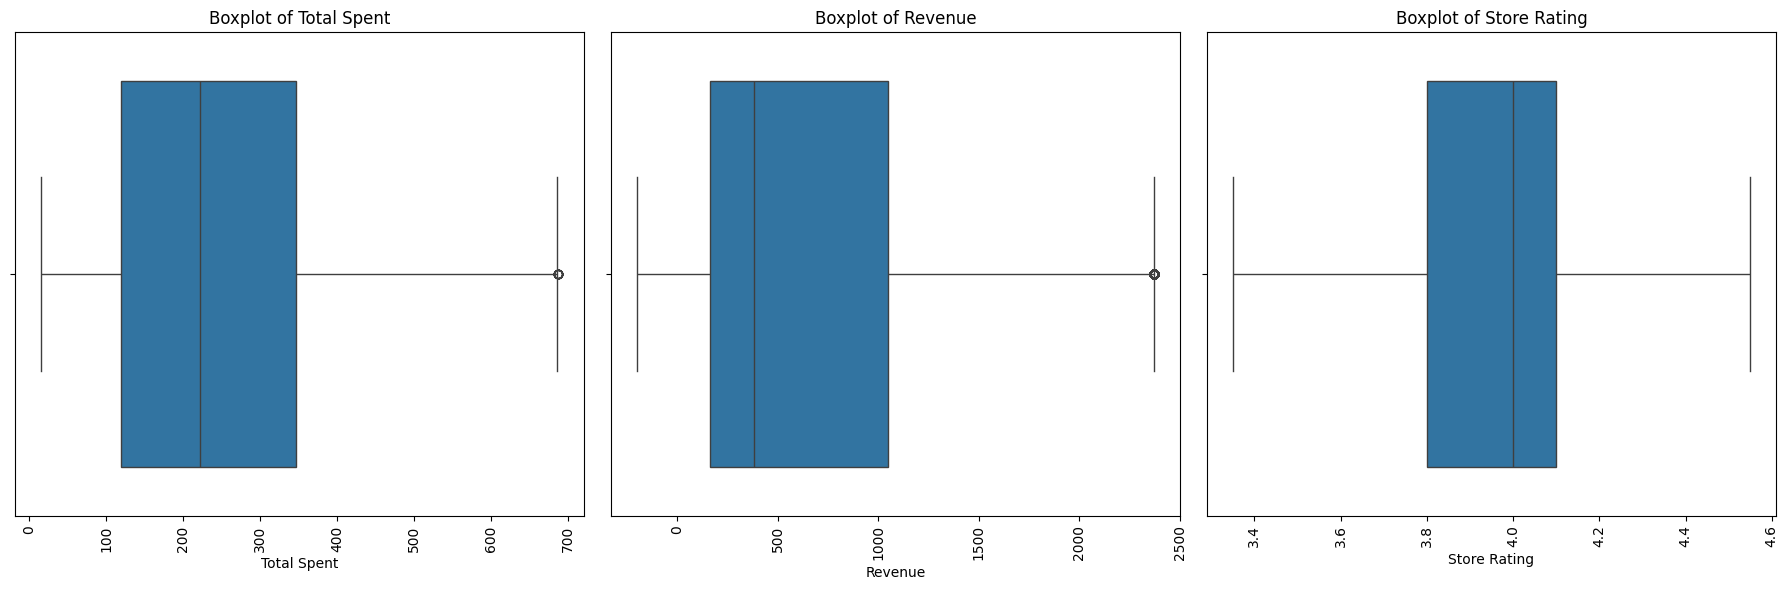

In [36]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the columns in outlier_col and plot each in the corresponding subplot
for i, col in enumerate(outlier_col):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Display the plots
plt.tight_layout()
plt.show()

**Feature Engineering**

In [37]:
# create two new features

# 1.ratio of "Total Spent" to "Items Purchased"
df['Spend per Item'] = df['Total Spent'] / df['Items Purchased']

# 2."Discounted Spend"
df['Discounted Spend'] = df['Total Spent'] * (1 - (df['Discount (%)']/100))

df[['Spend per Item','Discounted Spend']]=df[['Spend per Item','Discounted Spend']].round(1)

In [38]:
df.head(3)

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time,Spend per Item,Discounted Spend
0,56,1,29.226195,47.077380,1.0,1,Male,South,Accessories,UPI,149.252145,3.7,3.6,1.0,Evening,29.2,15.5
1,69,10,420.142612,7.985739,3.8,1,Female,South,Accessories,Cash,1485.524222,3.6,25.8,1.0,Evening,42.0,386.6
2,46,4,127.742817,37.225718,1.8,1,Male,East,Laptop,Credit Card,85.550131,3.9,7.0,1.0,Morning,31.9,80.2


In [39]:
# Drop Orginal Features
df= df.drop(columns=['Items Purchased','Total Spent','Discount (%)','Revenue'], axis=1)


**Encoding**

In [40]:
df.dtypes

,0
Age,int64
Satisfaction Score,float64
Warranty Extension,int64
Gender,object
Region,object
Product Category,object
Payment Method,object
Store Rating,float64
Loyalty Score,float64
Membership Status,float64


In [41]:
categorical_columns=['Gender','Payment Method','Preferred Visit Time','Region','Product Category']

In [42]:
#Encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(df[categorical_columns])
encoded_data
encoded_categorical_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(categorical_columns))
encoded_categorical_df
data_encoded=pd.concat([df.drop(columns=categorical_columns),encoded_categorical_df],axis=1)
data_encoded.head()

,Age,Satisfaction Score,Warranty Extension,Store Rating,Loyalty Score,Membership Status,Spend per Item,Discounted Spend,Gender_Female,Gender_Male,Gender_Other,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Net Banking,Payment Method_UPI,Preferred Visit Time_Afternoon,Preferred Visit Time_Evening,Preferred Visit Time_Morning,Region_East,Region_North,Region_South,Region_West,Product Category_Accessories,Product Category_Laptop,Product Category_Mobile,Product Category_Tablet,Product Category_Television
0,56,1.0,1,3.7,3.6,1.0,29.2,15.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69,3.8,1,3.6,25.8,1.0,42.0,386.6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,46,1.8,1,3.9,7.0,1.0,31.9,80.2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,32,1.9,0,3.9,7.6,1.0,46.4,383.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,3.9,0,3.8,29.5,0.0,46.8,577.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
df.dtypes

,0
Age,int64
Satisfaction Score,float64
Warranty Extension,int64
Gender,object
Region,object
Product Category,object
Payment Method,object
Store Rating,float64
Loyalty Score,float64
Membership Status,float64


**Spitting the dataset into x and y**

In [44]:
# Spliting data as Independent and Dependent Variables
x=data_encoded.drop('Loyalty Score',axis=1)
y=data_encoded['Loyalty Score']

In [45]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**scaling**

In [46]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Feature Selection**

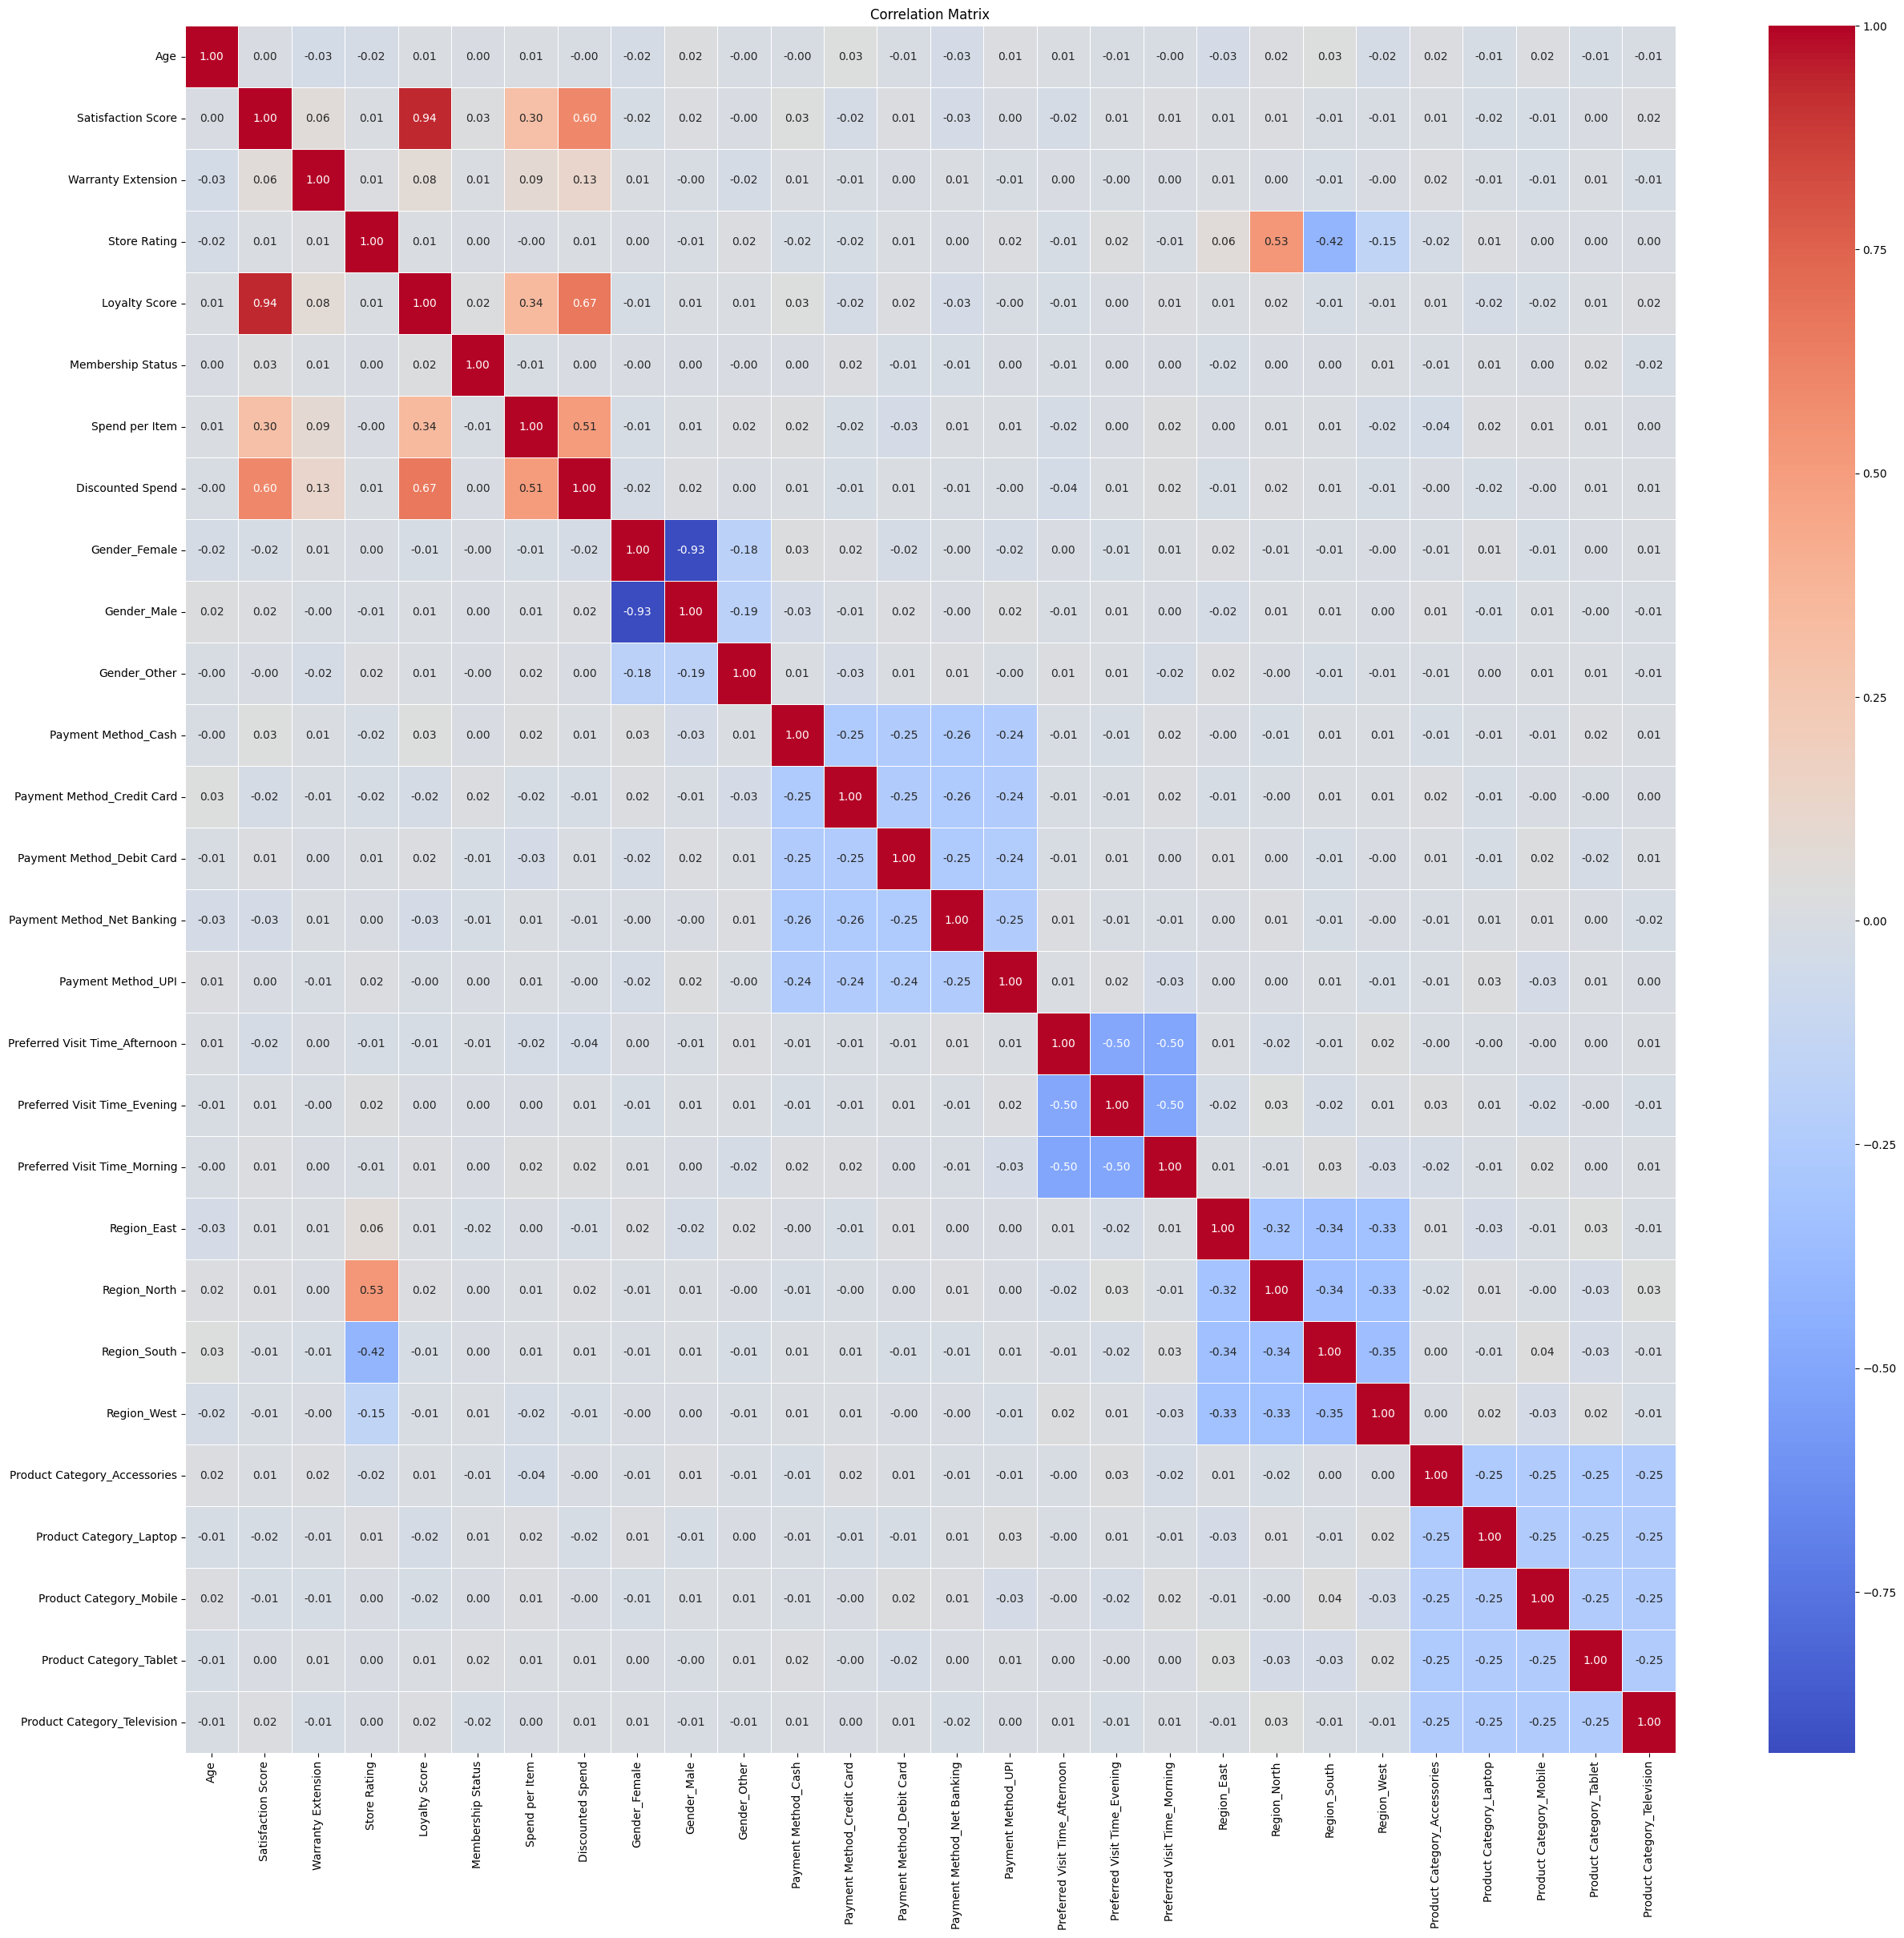

In [47]:
# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(30, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [48]:
# Correlation of each feature with the target variable 'Loyalty Score'
correlation_with_target = data_encoded.corr()['Loyalty Score'].sort_values(ascending=False)
print(correlation_with_target)


Loyalty Score                     1.000000
Satisfaction Score                0.935089
Discounted Spend                  0.667566
Spend per Item                    0.337595
Warranty Extension                0.076009
Payment Method_Cash               0.034500
Membership Status                 0.020117
Payment Method_Debit Card         0.017862
Product Category_Television       0.017737
Region_North                      0.016709
Preferred Visit Time_Morning      0.012752
Gender_Male                       0.011117
Product Category_Accessories      0.009557
Age                               0.009298
Product Category_Tablet           0.008110
Gender_Other                      0.005959
Region_East                       0.005391
Store Rating                      0.005236
Preferred Visit Time_Evening      0.002032
Payment Method_UPI               -0.003433
Region_West                      -0.010100
Region_South                     -0.011455
Gender_Female                    -0.013358
Preferred V

This gives features and their correlation values with the target variable. Satisfaction Score,Revenue,Discounted Spend ,Total Spent,Items Purchased ,Spend per Item have high positive correlation with loyalty score whereas Discount (%)shows high negative correlation with loyalty score

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                           Feature  Importance
1               Satisfaction Score    0.877316
6                 Discounted Spend    0.041941
5                   Spend per Item    0.018766
0                              Age    0.015506
3                     Store Rating    0.009682
4                Membership Status    0.002040
26     Product Category_Television    0.001981
24         Product Category_Mobile    0.001951
22    Product Category_Accessories    0.001910
17    Preferred Visit Time_Morning    0.001829
21                     Region_West    0.001813
12       Payment Method_Debit Card    0.001758
15  Preferred Visit Time_Afternoon    0.001756
13      Payment Method_Net Banking    0.001749
25         Product Category_Tablet    0.001713
2               Warranty Extension    0.001688
11      Payment Method_Credit Card    0.001672
20                    Region_South    0.001669
10             Payment Method_Cash    0.001664
14              Payment Method_UPI    0.001662
16    Preferr

**Using Mutual Info Regression**

mutual_info_regression computes the mutual information score for each feature in x_train_scaled with respect to the target variable y_train.
The higher the mutual information, the stronger the relationship between the feature and the target.

In [50]:
#using mutual info regression
#calculating mutual information
from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information between each feature and the target variable
mi_values = mutual_info_regression(x_train_scaled, y_train)

# Create a DataFrame to hold the feature names and their mutual information values
mi_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Mutual Information': mi_values
})

# Sort the mutual information values in descending order
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Display the result
print(mi_df)

                           Feature  Mutual Information
1               Satisfaction Score            0.923561
6                 Discounted Spend            0.307362
5                   Spend per Item            0.080286
0                              Age            0.019237
2               Warranty Extension            0.011095
12       Payment Method_Debit Card            0.010714
15  Preferred Visit Time_Afternoon            0.008301
16    Preferred Visit Time_Evening            0.007305
21                     Region_West            0.004953
14              Payment Method_UPI            0.004626
25         Product Category_Tablet            0.001284
26     Product Category_Television            0.001009
17    Preferred Visit Time_Morning            0.000937
7                    Gender_Female            0.000843
11      Payment Method_Credit Card            0.000000
10             Payment Method_Cash            0.000000
9                     Gender_Other            0.000000
8         

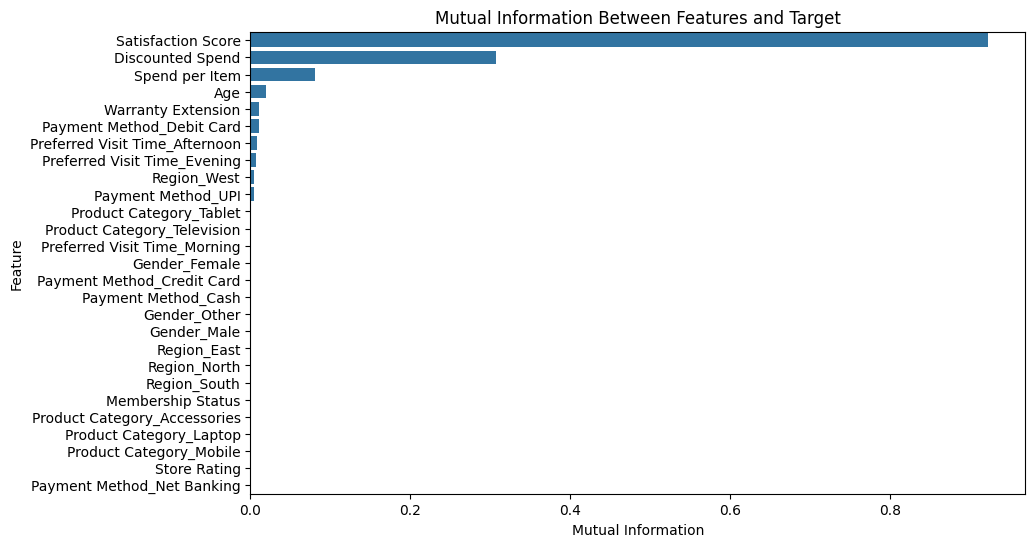

In [51]:
# Plot mutual information
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information Between Features and Target')
plt.show()

In [52]:
# Sorting the features by Mutual Information scores in descending order
top_features = mi_df.sort_values(by='Mutual Information', ascending=False).head(4)

# Selecting the top 4 features
x_train_selected = x_train[top_features['Feature'].tolist()]

print("Top 4 selected features based on Mutual Information:")
print(top_features)


Top 4 selected features based on Mutual Information:
              Feature  Mutual Information
1  Satisfaction Score            0.923561
6    Discounted Spend            0.307362
5      Spend per Item            0.080286
0                 Age            0.019237


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_selected, y_train)

# Get feature importance from the trained model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': x_train_selected.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


              Feature  Importance
0  Satisfaction Score    0.879910
1    Discounted Spend    0.058240
2      Spend per Item    0.033684
3                 Age    0.028166


In [54]:
x_test_selected = x_test[top_features['Feature'].tolist()]


**Model Selection and Testing**


In [55]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
}

# Initialize dictionaries to store metrics for each model
mse_scores = {}
r2_scores = {}
rmse_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train_selected, y_train)  # Train the model
    y_pred = model.predict(x_test_selected)  # Predict on the test set

    # Calculate MSE, RMSE, and R²
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the performance metrics
    mse_scores[model_name] = mse
    rmse_scores[model_name] = rmse
    r2_scores[model_name] = r2

# Display performance of each model
print("\nModel Performance Summary:")
for model_name in models.keys():
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse_scores[model_name]}")
    print(f"Root Mean Squared Error: {rmse_scores[model_name]}")
    print(f"R² Score: {r2_scores[model_name]}")

# Select the top two models based on lowest MSE and highest R² score
# Sorting by MSE (lowest is better) and R² (highest is better)
sorted_models_by_mse = sorted(mse_scores.items(), key=lambda x: x[1])
sorted_models_by_r2 = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Get top 2 models based on MSE and R² score
best_model_mse = sorted_models_by_mse[0][0]
second_best_model_mse = sorted_models_by_mse[1][0]
best_model_r2 = sorted_models_by_r2[0][0]
second_best_model_r2 = sorted_models_by_r2[1][0]

print(f"\nTop 2 models based on MSE:")
print(f"1. {best_model_mse}")
print(f"2. {second_best_model_mse}")

print(f"\nTop 2 models based on R² Score:")
print(f"1. {best_model_r2}")
print(f"2. {second_best_model_r2}")




Model Performance Summary:

Linear Regression Performance:
Mean Squared Error: 9.028931237362976
Root Mean Squared Error: 3.0048180040333516
R² Score: 0.8906657526274604

Lasso Regression Performance:
Mean Squared Error: 9.406337059128338
Root Mean Squared Error: 3.0669752296241874
R² Score: 0.8860956235178292

Ridge Regression Performance:
Mean Squared Error: 9.028564181213067
Root Mean Squared Error: 3.0047569254788424
R² Score: 0.8906701974290475

Random Forest Regressor Performance:
Mean Squared Error: 10.645802083722225
Root Mean Squared Error: 3.262790536292856
R² Score: 0.8710865408206685

Gradient Boosting Regressor Performance:
Mean Squared Error: 9.12678925478619
Root Mean Squared Error: 3.021057638441576
R² Score: 0.889480758257356

Top 2 models based on MSE:
1. Ridge Regression
2. Linear Regression

Top 2 models based on R² Score:
1. Ridge Regression
2. Linear Regression


**Hyperparameter Tuning with Grid Search**

In [56]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV

# Ridge Regression Hyperparameter Tuning
ridge_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Solver options
}

# Grid Search for Ridge Regression
ridge_grid_search = GridSearchCV(Ridge(random_state=42), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(x_train_selected, y_train)

print("Best Parameters for Ridge Regression:", ridge_grid_search.best_params_)

# Linear Regression does not have hyperparameters, but you can still perform a basic evaluation.
linear_model = LinearRegression()
linear_model.fit(x_train_selected, y_train)

# Evaluating Linear Regression
linear_regression_score = linear_model.score(x_train_selected, y_train)
print("Linear Regression R^2 Score on Training Data:", linear_regression_score)


Best Parameters for Ridge Regression: {'alpha': 1, 'solver': 'sparse_cg'}
Linear Regression R^2 Score on Training Data: 0.8938293459520378


**Final Model Selection and Evaluation**

In [57]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# Final Ridge Regression Model after Hyperparameter Tuning
final_ridge_model = ridge_grid_search.best_estimator_
ridge_predictions = final_ridge_model.predict(x_test_selected)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("\nFinal Ridge Regression Model Performance:")
print(f"Mean Squared Error: {ridge_mse}")
print(f"Root Mean Squared Error: {ridge_rmse}")
print(f"R² Score: {ridge_r2}")

# Final Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train_selected, y_train)
linear_predictions = linear_model.predict(x_test_selected)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_predictions)

print("\nFinal Linear Regression Model Performance:")
print(f"Mean Squared Error: {linear_mse}")
print(f"Root Mean Squared Error: {linear_rmse}")
print(f"R² Score: {linear_r2}")

# Select the best model between Ridge Regression and Linear Regression
if ridge_r2 > linear_r2:
    final_model = final_ridge_model
    print("\nRidge Regression is selected as the final model.")
else:
    final_model = linear_model
    print("\nLinear Regression is selected as the final model.")

# Save the best model
joblib.dump(final_model, 'final_model.pkl')
print(f"\nThe best model has been saved as 'final_model.pkl'.")



Final Ridge Regression Model Performance:
Mean Squared Error: 9.02856419059865
Root Mean Squared Error: 3.00475692704063
R² Score: 0.8906701973153945

Final Linear Regression Model Performance:
Mean Squared Error: 9.028931237362976
Root Mean Squared Error: 3.0048180040333516
R² Score: 0.8906657526274604

Ridge Regression is selected as the final model.

The best model has been saved as 'final_model.pkl'.
